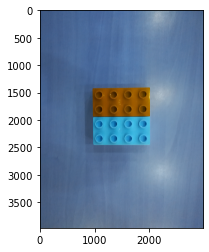

In [2]:
# ez a témalabon pandassal javított változat

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

DATADIR = "E:/Egyetem/5_felev/Temalab/LEGO/"
CATEGORIES = ['phase_1','phase_2','phase_3','phase_4','phase_5','phase_6','phase_6+errors']


#egy kép kiírása: (nyilván bonyolultabb, mint kéne, de itt meg van mutatva, hogy hogy is történik az olvasás)
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR) 
        plt.imshow(img_array)
        plt.show()
        break #break nélkül az összeset mutatná
    break

In [3]:
print(img_array)

[[[ 81  88 131]
  [ 70  89 134]
  [ 60  89 134]
  ...
  [ 81  94 132]
  [ 78  94 131]
  [ 82  98 135]]

 [[ 80  88 128]
  [ 72  89 132]
  [ 62  88 134]
  ...
  [ 78  96 133]
  [ 75  94 131]
  [ 78  97 134]]

 [[ 78  87 125]
  [ 72  88 130]
  [ 65  90 134]
  ...
  [ 77  99 135]
  [ 71  97 133]
  [ 71  99 134]]

 ...

 [[ 77  85 114]
  [ 75  84 111]
  [ 74  86 110]
  ...
  [ 81 103 128]
  [ 80 105 125]
  [ 80 111 126]]

 [[ 74  84 114]
  [ 74  85 113]
  [ 76  88 112]
  ...
  [ 85 105 130]
  [ 82 106 126]
  [ 78 109 124]]

 [[ 74  84 114]
  [ 75  86 114]
  [ 79  91 115]
  ...
  [ 88 108 133]
  [ 83 107 127]
  [ 75 106 121]]]


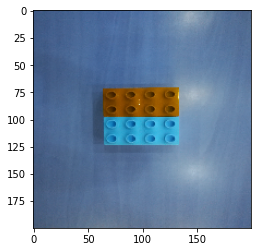

In [5]:
IMG_SIZE = 200

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
training_data = []

def create_training_data():
    errorcounter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR) #maradjon színes, ne állítsuk greyscale-re
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exeption as e:
                errorcounter+=1   #megnéztük, hogy volt-e error
    print(errorcounter)
            
create_training_data()

0


In [7]:
print(len(training_data))

610


In [8]:
#h ne sorszám alapján gondolkodjon
import random

random.shuffle(training_data)

In [9]:
target = [] #---> 0,1,2,3
data = [] #---->array

for features, label in training_data:
    data.append(features.flatten())  #a flatten miatt lesz a data egy dimenziós, amit a printnél láthatunk is
    target.append(label)

print(data[1].shape)

(120000,)


In [10]:
for i in range(10):
    print(target[i])

0
3
1
0
4
6
0
2
3
2


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.2)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [12]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))

488
488
122


In [13]:
model.fit(X_train,Y_train)

C:\Users\meste\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(X_test, Y_test) #pontosság

0.9180327868852459

In [15]:
#megnézzük, hogy mit tippel egy bizonyos képre (hogy tényleg jól csinálja-e)
print(model.predict([X_test[2]]))
plt.imshow(X_test[2].reshape(IMG_SIZE,IMG_SIZE))
plt.show()

[3]


ValueError: cannot reshape array of size 120000 into shape (200,200)

In [16]:
# innentől már csak a confusion mátrixot készítjuk
Y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[15,  0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  1],
       [ 0,  0, 19,  0,  0,  0,  0],
       [ 0,  0,  2, 17,  0,  0,  0],
       [ 0,  0,  1,  0, 25,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  1],
       [ 0,  0,  0,  0,  0,  5,  8]], dtype=int64)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Text(69.0, 0.5, 'Truth')

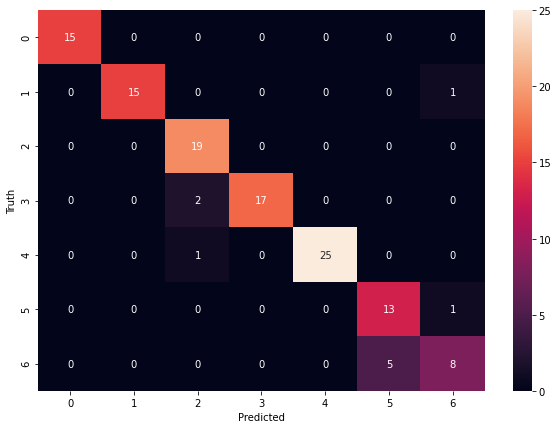

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')